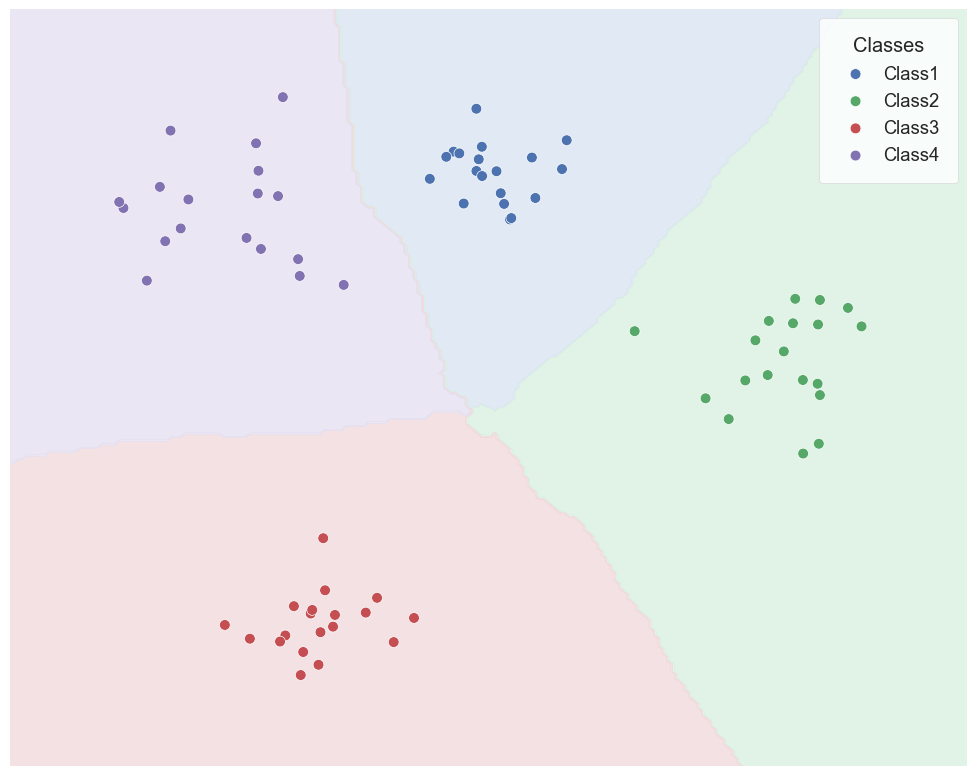

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with 4 classes
class_sizes = [10, 15, 20, 30]
n_classes = len(class_sizes)
n_samples = sum(class_sizes)

# Create blobs with different standard deviations
X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2,
                 cluster_std=[1.0, 1.5, 1.2, 1.8], random_state=42)

# Create DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = pd.Series(y).apply(lambda x: f'Class{x+1}')

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df[['Feature1', 'Feature2']])
y = df['Class'].values

# Create KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Create mesh grid
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# Predict and reshape
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([int(c[-1]) for c in Z]).reshape(xx.shape)

# Use Seaborn's "deep" palette (can also try "bright", "muted", etc.)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Seaborn's default colors
cmap_light = ListedColormap(['#DAE5F2', '#DAF0E2', '#F2DADC', '#E5E0F0'])  # Light versions

# Create figure
plt.figure(figsize=(10, 8), facecolor='white')

# Plot decision regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot data points with Seaborn colors
for i, class_name in enumerate(np.unique(y)):
    plt.scatter(X[y == class_name, 0], 
               X[y == class_name, 1], 
               c=[colors[i]]*sum(y == class_name),
               edgecolor='w',
               linewidth=0.5,
               s=60,
               label=class_name)

# Remove all axes
plt.axis('off')

# Add elegant legend
legend = plt.legend(title='Classes', 
                   frameon=True,
                   loc='upper right',
                   bbox_to_anchor=(1, 1),
                   borderpad=1,
                   handletextpad=0.5)
legend.get_frame().set_edgecolor('lightgray')
legend.get_frame().set_linewidth(0.5)

# Adjust layout to maximize visualization area
plt.tight_layout()
plt.show()

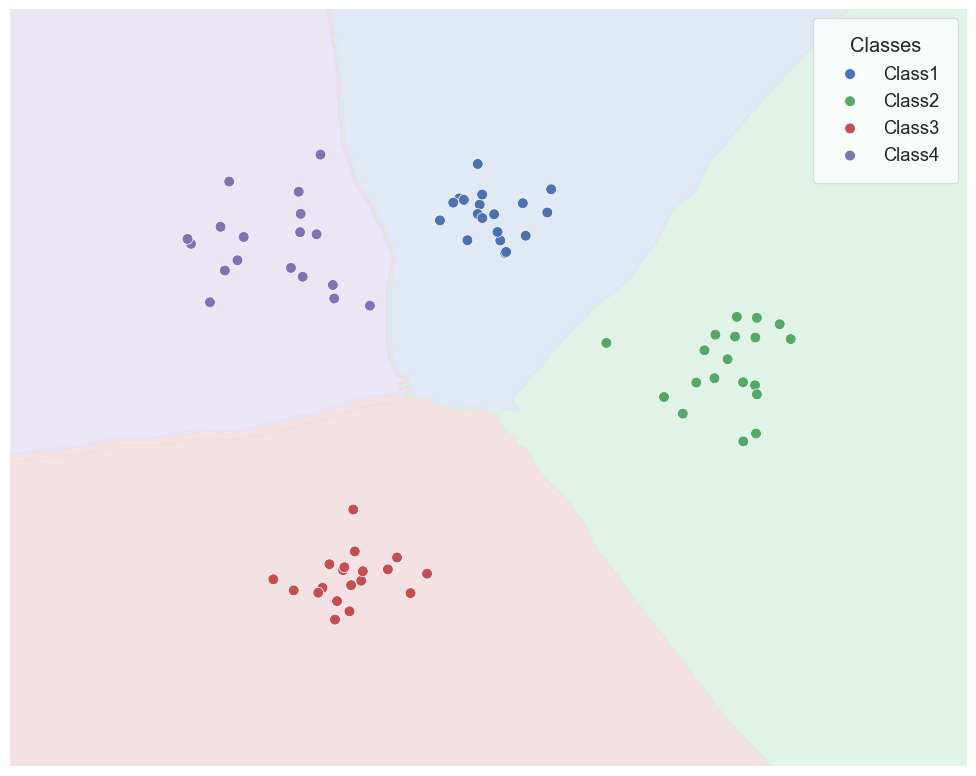

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter

# 设置随机种子
np.random.seed(42)

# 生成数据
class_sizes = [10, 15, 20, 30]
X, y = make_blobs(n_samples=sum(class_sizes), centers=4, n_features=2,
                 cluster_std=[1.0, 1.5, 1.2, 1.8], random_state=42)

# 创建DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = pd.Series(y).apply(lambda x: f'Class{x+1}')

# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(df[['Feature1', 'Feature2']])
y = df['Class'].values

# 创建KNN分类器 - 使用更大的k值
k = 15  # 增大k值使边界更平滑
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# 创建更精细的网格
h = 0.01  # 更小的步长
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# 使用预测概率而非硬分类
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)  # 获取最大概率类别
Z = Z.reshape(xx.shape)

# 对决策边界应用高斯模糊
Z_smooth = gaussian_filter(Z.astype(float), sigma=1)

# Seaborn颜色
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']
cmap_light = ListedColormap(['#DAE5F2', '#DAF0E2', '#F2DADC', '#E5E0F0'])

# 创建图形
plt.figure(figsize=(10, 8), facecolor='white')

# 绘制平滑后的决策区域
plt.contourf(xx, yy, Z_smooth, cmap=cmap_light, alpha=0.8)

# 绘制数据点
for i, class_name in enumerate(np.unique(y)):
    plt.scatter(X[y == class_name, 0], 
               X[y == class_name, 1], 
               c=[colors[i]]*sum(y == class_name),
               edgecolor='w',
               linewidth=0.5,
               s=60,
               label=class_name)

# 美化图形
plt.axis('off')
legend = plt.legend(title='Classes', frameon=True, borderpad=1)
legend.get_frame().set_edgecolor('lightgray')
plt.tight_layout()
plt.show()

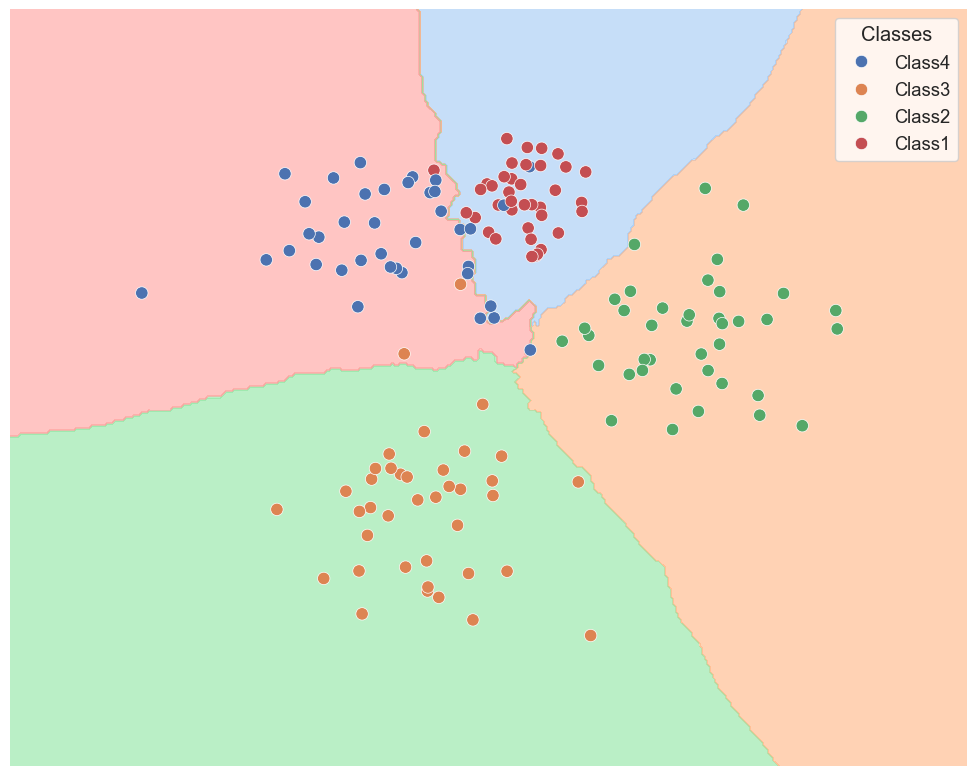

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 设置Seaborn样式
sns.set(style="white", palette="deep", font_scale=1.2)
plt.rcParams['figure.facecolor'] = 'white'

# 生成数据
class_sizes = [10, 70, 50, 25]
X, y = make_blobs(n_samples=sum(class_sizes), centers=4, n_features=2,
                 cluster_std=[1.5, 3.0, 3.0, 3.0], random_state=42)

# 创建DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = pd.Series(y).apply(lambda x: f'Class{x+1}')

# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(df[['Feature1', 'Feature2']])
y = df['Class'].values

# 创建KNN分类器
k = 15  # 较大的k值使边界更平滑
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# 创建网格
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# 预测概率
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# 使用Seaborn的颜色 palette
palette = sns.color_palette("deep", n_colors=4)
cmap_light = ListedColormap(sns.color_palette("pastel", n_colors=4))

# 创建图形
plt.figure(figsize=(10,8))

# 绘制决策边界
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# 使用Seaborn的散点图绘制数据点
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette,
                edgecolor='white', linewidth=0.5, s=80)

# 美化图形
plt.axis('off')
plt.legend(title='Classes', frameon=True, bbox_to_anchor=(1, 1))
plt.gca().set_facecolor('white')
plt.tight_layout()

# 显示图形
plt.show()

D:\IDE\Anaconda\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


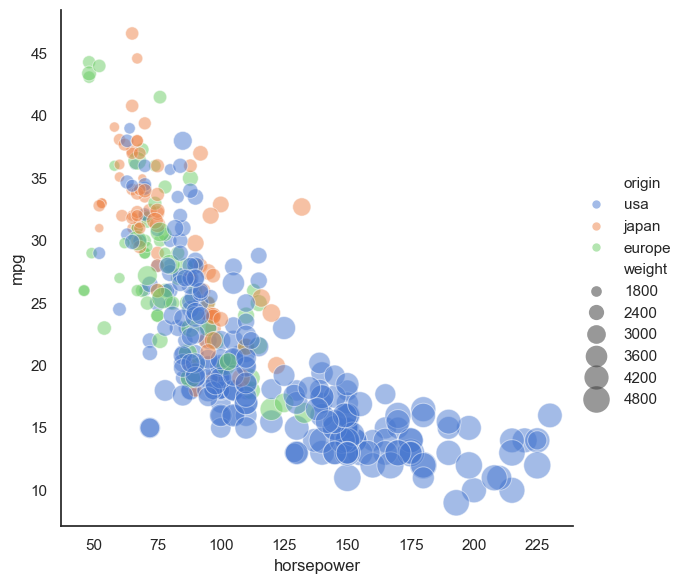

In [13]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

C:\Users\zsc\AppData\Local\Temp\ipykernel_19992\3553020578.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


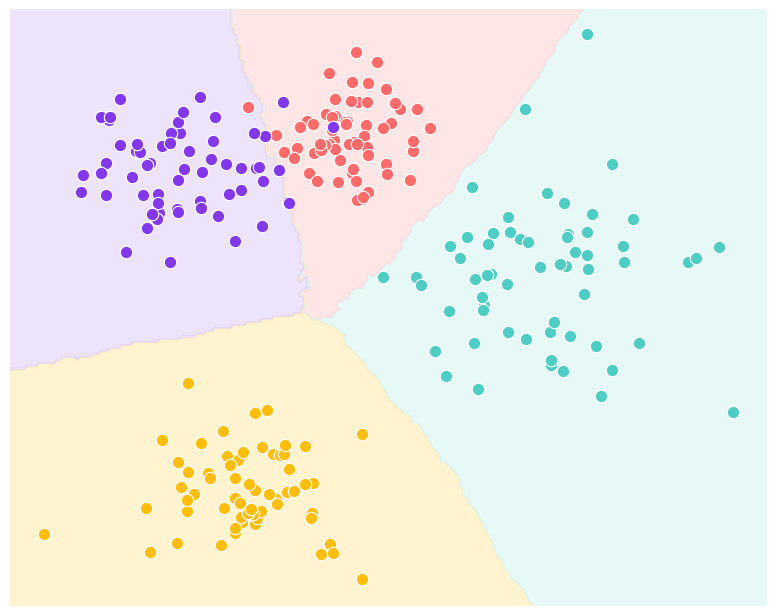

In [38]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm, tree
from utils.colour import POINT_COLORS, REGION_COLORS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 设置样式（无图例版本）
plt.style.use('seaborn-white')
plt.rcParams['figure.facecolor'] = 'white'

# 生成数据
class_sizes = [30, 80, 75, 58]
X, y = make_blobs(n_samples=sum(class_sizes), centers=4, n_features=2,
                 cluster_std=[1.5, 3.0, 2.2, 1.8], random_state=42)

# 创建DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = pd.Series(y).apply(lambda x: f'Class{x+1}')

# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(df[['Feature1', 'Feature2']])
y = df['Class'].values

# 创建KNN分类器
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
# knn = svm.SVC()
# knn = svm.SVC(decision_function_shape='ovo')
# knn = tree.DecisionTreeClassifier()
# knn = HistGradientBoostingClassifier(max_iter=100)
knn.fit(X, y)

# 计算数据范围
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x_margin = (x_max - x_min) * 0.05
y_margin = (y_max - y_min) * 0.05

# 创建网格
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min-x_margin, x_max+x_margin, h),
                    np.arange(y_min-y_margin, y_max+y_margin, h))

# 预测
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([list(POINT_COLORS.keys()).index(c) for c in Z])
Z = Z.reshape(xx.shape)

# 准备颜色
cmap_light = ListedColormap(list(REGION_COLORS.values()))

# 创建图形
plt.figure(figsize=(8, 6.4))

# 绘制决策区域
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# 绘制数据点（不添加label参数即不生成图例）
for class_name, color in POINT_COLORS.items():
    mask = (y == class_name)
    plt.scatter(X[mask, 0], X[mask, 1], 
               color=color,
               edgecolor='white',
               linewidth=0.8,
               s=80)

# 完全去除坐标轴和图例
plt.axis('off')

# 紧凑布局
plt.tight_layout()
plt.show()